In [1]:
pip install opencv-python numpy matplotlib

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
    --------------------------------------- 0.6/38.8 MB 12.6 MB/s eta 0:00:04
   - -------------------------------------- 1.1/38.8 MB 11.9 MB/s eta 0:00:04
   - -------------------------------------- 1.6/38.8 MB 11.6 MB/s eta 0:00:04
   -- ------------------------------------- 2.2/38.8 MB 11.4 MB/s eta 0:00:04
   -- ------------------------------------- 2.7/38.8 MB 11.3 MB/s eta 0:00:04
   --- ------------------------------------ 3.2/38.8 MB 11.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/38.8 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/38.8 MB 11.1 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/38.8 MB 11.1 MB/s eta 0:00:04
   ---

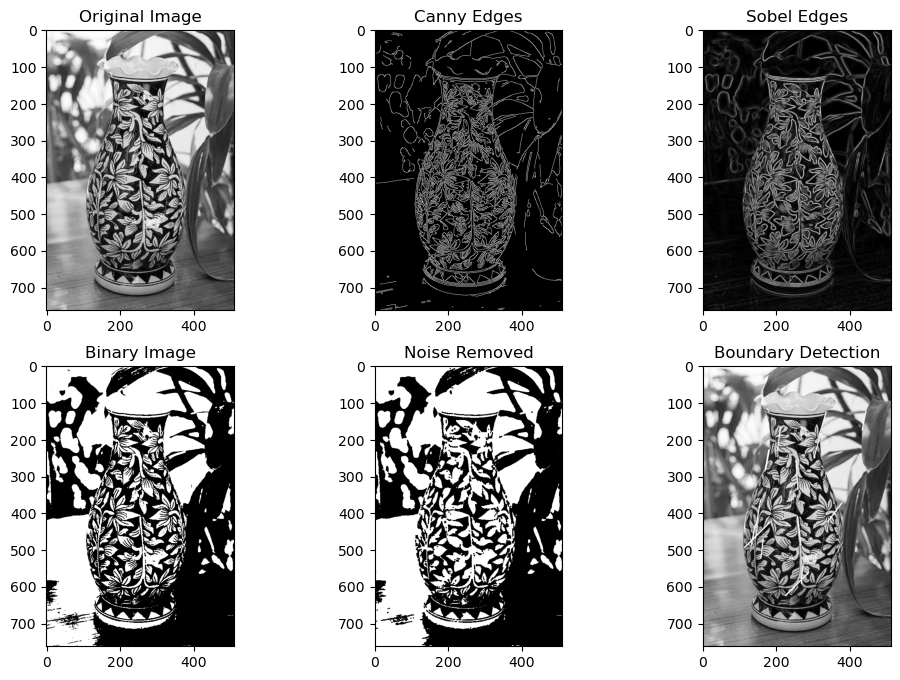

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Image Acquisition - Read the image
image_path = 'C:\\Users\\deepi\\Downloads\\flower_vase.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Edge Detection using Canny and Sobel
canny_edges = cv2.Canny(image, 100, 200)
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Sobel in x-direction
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Sobel in y-direction
sobel_edges = cv2.magnitude(sobelx, sobely)

# Step 3: Binary Conversion using Otsu's thresholding
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 4: Binary Image Preprocessing - Noise Removal using Morphological Operations
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# Step 5: Boundary Detection using Hough Transform
edges = cv2.Canny(eroded_image, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

boundary_image = np.copy(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(boundary_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Step 6: Display the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edges')
plt.subplot(2, 3, 3), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel Edges')
plt.subplot(2, 3, 4), plt.imshow(binary_image, cmap='gray'), plt.title("Binary Image")
plt.subplot(2, 3, 5), plt.imshow(eroded_image, cmap='gray'), plt.title('Noise Removed')
plt.subplot(2, 3, 6), plt.imshow(boundary_image, cmap='gray'), plt.title('Boundary Detection')
plt.show()


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode
image = cv2.imread('C:\\Users\\deepi\\Downloads\\flower_vase.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Image not found.")
else:
    print(f"Image loaded successfully with shape: {image.shape}")


Image loaded successfully with shape: (762, 511)


Image loaded successfully with shape: (762, 511)


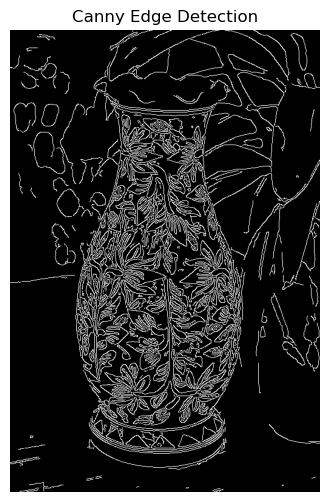

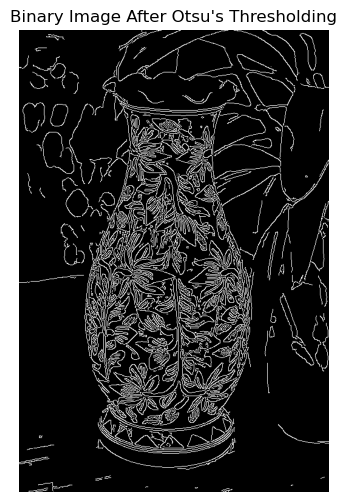

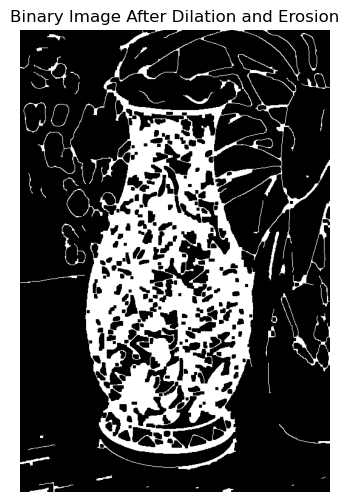

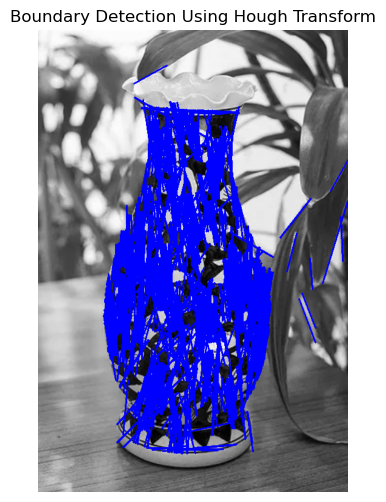

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Image Acquisition (Load the image)
image = cv2.imread('C:\\Users\\deepi\\Downloads\\flower_vase.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found.")
else:
    print(f"Image loaded successfully with shape: {image.shape}")

    # 2. Edge Detection (Canny Edge Detection)
    edges = cv2.Canny(image, 100, 200)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')
    plt.show()

    # 3. Binary Conversion (Otsu's Thresholding)
    _, binary_image = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary Image After Otsu's Thresholding")
    plt.axis('off')
    plt.show()

    # 4. Binary Image Preprocessing (Morphological Operations)
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(binary_image, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(eroded, cmap='gray')
    plt.title("Binary Image After Dilation and Erosion")
    plt.axis('off')
    plt.show()

    # 5. Boundary Detection (Hough Transform)
    lines = cv2.HoughLinesP(eroded, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)
    
    # Create a color copy of the image to draw the lines
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Display the image with detected boundaries
    plt.figure(figsize=(6, 6))
    plt.imshow(output_image)
    plt.title("Boundary Detection Using Hough Transform")
    plt.axis('off')
    plt.show()


C:\Users\deepi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Image loaded successfully with shape: (762, 511)


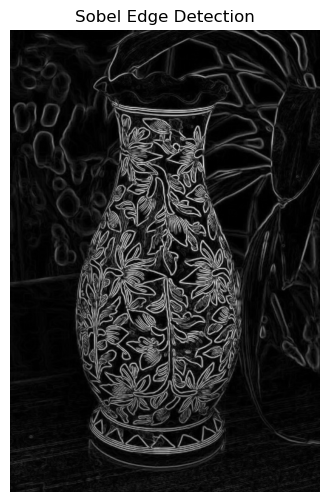

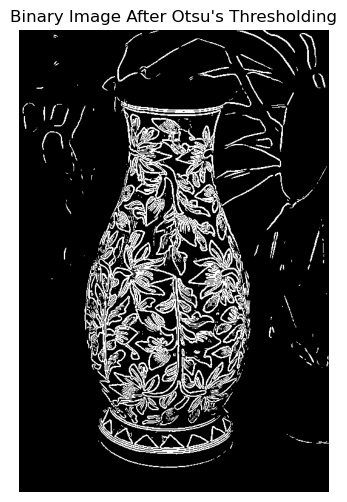

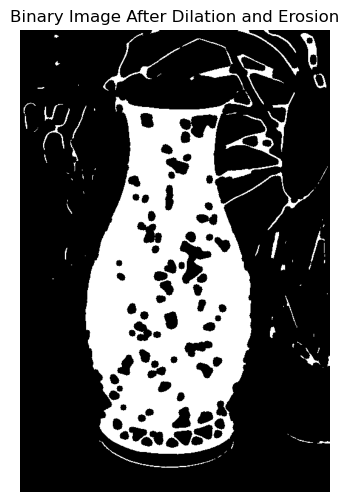

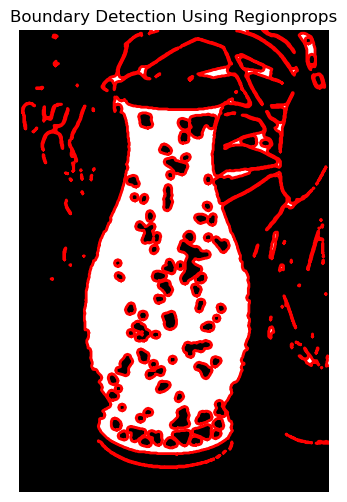

In [10]:
from skimage import io, filters, morphology, measure
import matplotlib.pyplot as plt

# 1. Image Acquisition (Load the image)
image = io.imread('C:\\Users\\deepi\\Downloads\\flower_vase.jpg', as_gray=True)

if image is None:
    print("Error: Image not found.")
else:
    print(f"Image loaded successfully with shape: {image.shape}")

    # 2. Edge Detection (Sobel Edge Detection)
    edges = filters.sobel(image)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(edges, cmap='gray')
    plt.title("Sobel Edge Detection")
    plt.axis('off')
    plt.show()

    # 3. Binary Conversion (Otsu's Thresholding)
    threshold_value = filters.threshold_otsu(edges)
    binary_image = edges > threshold_value
    
    plt.figure(figsize=(6, 6))
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary Image After Otsu's Thresholding")
    plt.axis('off')
    plt.show()

    # 4. Binary Image Preprocessing (Morphological Operations)
    dilated = morphology.dilation(binary_image, morphology.disk(5))
    eroded = morphology.erosion(dilated, morphology.disk(5))
    
    plt.figure(figsize=(6, 6))
    plt.imshow(eroded, cmap='gray')
    plt.title("Binary Image After Dilation and Erosion")
    plt.axis('off')
    plt.show()

    # 5. Boundary Detection (Using Regionprops to detect contours)
    contours = measure.find_contours(eroded, level=0.8)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(eroded, cmap='gray')

    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)

    plt.title("Boundary Detection Using Regionprops")
    plt.axis('off')
    plt.show()


Image loaded successfully with shape: (762, 511)


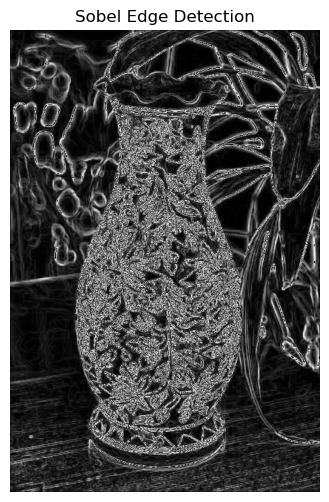

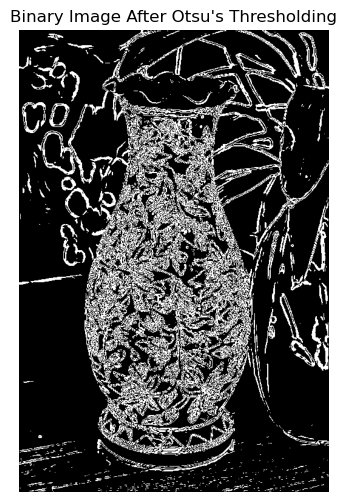

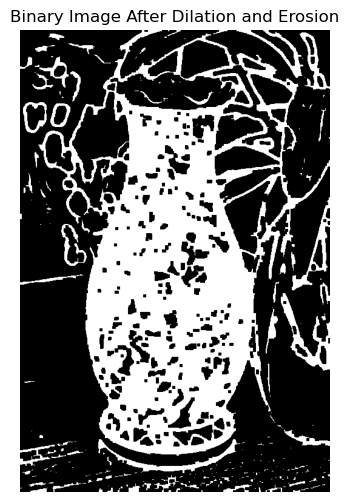

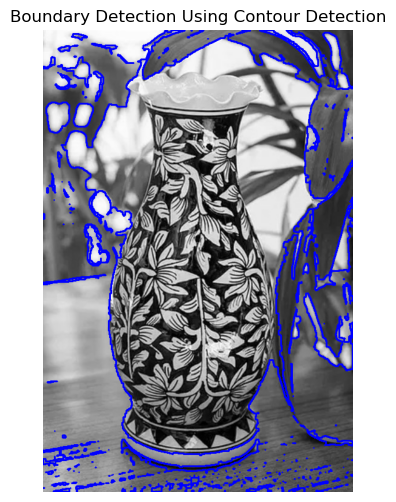

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Image Acquisition (Load the image)
image = cv2.imread('C:\\Users\\deepi\\Downloads\\flower_vase.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found.")
else:
    print(f"Image loaded successfully with shape: {image.shape}")

    # 2. Edge Detection (Sobel Edge Detection)
    # Apply Sobel edge detection to detect edges in both horizontal (dx) and vertical (dy) directions.
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in the x-direction
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in the y-direction
    
    # Compute the magnitude of the gradient
    sobel_edges = cv2.magnitude(sobel_x, sobel_y)

    # Convert the magnitude to a scale of 0-255 and convert back to uint8
    sobel_edges = np.uint8(np.absolute(sobel_edges))

    # Display the Sobel edges
    plt.figure(figsize=(6, 6))
    plt.imshow(sobel_edges, cmap='gray')
    plt.title("Sobel Edge Detection")
    plt.axis('off')
    plt.show()

    # 3. Binary Conversion (Otsu's Thresholding)
    _, binary_image = cv2.threshold(sobel_edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Display the binary image
    plt.figure(figsize=(6, 6))
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary Image After Otsu's Thresholding")
    plt.axis('off')
    plt.show()

    # 4. Binary Image Preprocessing (Morphological Operations)
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(binary_image, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)
    
    # Display the preprocessed binary image
    plt.figure(figsize=(6, 6))
    plt.imshow(eroded, cmap='gray')
    plt.title("Binary Image After Dilation and Erosion")
    plt.axis('off')
    plt.show()

    # 5. Contour Detection (Find and Draw Contours)
    contours, hierarchy = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a color copy of the original image to draw the contours
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Draw the contours on the image
    cv2.drawContours(output_image, contours, -1, (0, 0, 255), 2)  # Red contours with thickness of 2

    # Display the image with detected contours
    plt.figure(figsize=(6, 6))
    plt.imshow(output_image)
    plt.title("Boundary Detection Using Contour Detection")
    plt.axis('off')
    plt.show()
